## Final Proposal: The Six-Year Itch

#### Principal Investigator: Shagun Varma <br> Email: [shagun.varma@stern.nyu.edu](sv1430@stern.nyu.edu)

A theory by political scientists, known as the [six-year itch](https://en.wikipedia.org/wiki/Six-year_itch), refers to the election during the incumbent President's sixth year in office wherein the party that holds the White House loses a significant number of House and Senate seats. This could be because a President in their second term does not need to worry about being reelected and therefore does not push for economic growth as much. This could create pessimism in the market that is reflected in stock prices. Through the lens of stock prices, I would like to study the impact of the six-year itch on market optimism. A link to an article that studies something similar can be found [here](https://www.affiancefinancial.com/node/147682).

I will be using stock price data for the S&P 500, Dow Jones and NASDAQ from [Yahoo Finance](https://finance.yahoo.com/quote/%5EGSPC/history?p=^GSPC&.tsrc=fin-srch), taking the date range from Jan 1961 (when JFK was elected President) to present. I will additionally use data on [President term dates](https://historyinpieces.com/research/presidential-inauguration-dates) and [CPI](https://www.bls.gov/cpi/data.htm) to adjust for inflation.

I anticipate that I will create three graphs:

- My primary graph would be the one [here](https://www.affiancefinancial.com/sites/default/files/users/SteveLear2/images/ChartforPolitics2.png). Instead of highlighting financial crises, I will mark the year where the President's sixth term took place and look at how the stock prices move from the sixth to eighth year.


- The second graph will compare market returns for each year the president was in office, to look for a potential drop in the sixth year.


- The third graph will look at market volatility during the sixth to eigth years. Optimism does not solely lie in the price, but how they move as well. I will compare the actual prices to the VIX, which looks at expecations of volatility.

---

### Data Report

**Overview:** The stock price data behind my project primarily comes from the [Yahoo Finance](https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC&.tsrc=fin-srch).

**Important Variables:** I will be looking at stock prices for tickers ^GSPC (S&P 500), ^DJI (Dow Jones Industrial Average), ^IXIC (NASDAQ Composite) and ^VIX (VIX) from Yahoo Finance. I will be taking the log of these values.

I will also obtain CPI data from the Bureau of Labor Statistics to adjust the stock prices for inflation.

I will additionally use data on President term dates to conduct a groupby. 

**Access** .csv and .xlsx files for the aforementioned data are readily available through Yahoo Finance and the Bureau of Labor Statistics.


**Requisite Packages**

In [1]:
import pandas as pd
import numpy as np # numerical analysis
import matplotlib.pyplot as plt # plotting
import datetime as dt # necessary date adjustments

**Grabing the Data:** I have saved all the stock price data on my computer and will import it here.

In [2]:
path = "C:\\Users\\shagu\\Desktop\\Data Bootcamp\\Final Project\\Data\\Stocks\\"
cpi_path = "CPI-U_base82-84.xlsx"
dji_path = "DJI.csv"
gspc_path = "GSPC.csv"
ixic_path = "IXIC.csv"

cpi = pd.read_excel(path + cpi_path)
dji = pd.read_csv(path + dji_path)
gspc = pd.read_csv(path + gspc_path)
ixic = pd.read_csv(path + ixic_path)

dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/29/1985,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000,DJI
1,1/30/1985,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000,DJI
2,1/31/1985,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000,DJI
3,2/1/1985,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000,DJI
4,2/4/1985,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000,DJI


I only need the date, close price and the stock type for my further calculations, so I will create new data frames with my desired columns.

In [3]:
stocks = [dji, gspc, ixic]

for df in stocks:
    df.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis = 1, inplace = True)

dji.head()

,Date,Close,Stock
0,1/29/1985,1292.619995,DJI
1,1/30/1985,1287.880005,DJI
2,1/31/1985,1286.770020,DJI
3,2/1/1985,1277.719971,DJI
4,2/4/1985,1290.079956,DJI


To check that my dates are in the correct datetime format:

In [4]:
dji.dtypes

Date      object
Close    float64
Stock     object
dtype: object

Since it isn't in the correct format, I will convert it.

In [5]:
for df in stocks:
    df["Date"] = pd.to_datetime(df['Date'])

dji.dtypes

Date     datetime64[ns]
Close           float64
Stock            object
dtype: object

In [6]:
for df in stocks:
    df.set_index('Date', inplace = True)

dji.head()

,Close,Stock
Date,,
1985-01-29,1292.619995,DJI
1985-01-30,1287.880005,DJI
1985-01-31,1286.770020,DJI
1985-02-01,1277.719971,DJI
1985-02-04,1290.079956,DJI


Before I adjust these prices for inflation, I want to resample the data so that it's monthly and my graph doesn't look too crowded.

In [7]:
dji_m = dji.resample('MS').mean()
gspc_m = gspc.resample('MS').mean()
ixic_m = ixic.resample('MS').mean()

dji_m.head()

,Close
Date,
1985-01-01,1289.090007
1985-02-01,1283.232101
1985-03-01,1268.829997
1985-04-01,1266.358114
1985-05-01,1279.397738


I now need to adjust my prices for inflation, and will import and use my CPI data to do so.

In [8]:
cpi.head()

,Date,CPI
0,01/01/1961,29.8
1,02/01/1961,29.8
2,03/01/1961,29.8
3,04/01/1961,29.8
4,05/01/1961,29.8


The dates are again not in a datetime format...

In [9]:
cpi["Date"] =  pd.to_datetime(cpi['Date'])
cpi.set_index('Date', inplace = True)

cpi.head()

,CPI
Date,
1961-01-01,29.8
1961-02-01,29.8
1961-03-01,29.8
1961-04-01,29.8
1961-05-01,29.8


Now, to merge CPI and stock data on the same table to conduct further inflation-adjustment calculations. We get NaN because CPI data is unavailable for the most recent months.

In [10]:
dji_cpi = dji_m.join(cpi)
gspc_cpi = gspc_m.join(cpi)
ixic_cpi = ixic_m.join(cpi)

ixic_cpi.tail()

,Close,CPI
Date,,
2019-01-01,6979.655715,251.712
2019-02-01,7430.077354,252.776
2019-03-01,7629.366653,254.202
2019-04-01,7994.920922,NaN
2019-05-01,8083.470052,NaN


I need to make the CPI into a multiplier before I can use it to adjust my stock prices for inflation.

In [18]:
stocks_cpi = [dji_cpi, gspc_cpi, ixic_cpi]

for df in stocks_cpi:
    df["CPI_Multiplier"] = df["CPI"]/100

gspc_cpi

,Close,CPI,CPI_Multiplier
Date,,,
1961-01-01,59.726191,29.800,0.29800
1961-02-01,62.172631,29.800,0.29800
1961-03-01,64.089090,29.800,0.29800
1961-04-01,65.934000,29.800,0.29800
1961-05-01,66.499048,29.800,0.29800
1961-06-01,65.575001,29.800,0.29800
1961-07-01,65.438500,30.000,0.30000
1961-08-01,67.789565,29.900,0.29900
1961-09-01,67.228000,30.000,0.30000


In [20]:
for df in stocks_cpi:
    df["infl_adj"] = df["Close"]/df["CPI_Multiplier"]

gspc_cpi

,Close,CPI,CPI_Multiplier,infl_adj
Date,,,,
1961-01-01,59.726191,29.800,0.29800,200.423459
1961-02-01,62.172631,29.800,0.29800,208.632991
1961-03-01,64.089090,29.800,0.29800,215.064062
1961-04-01,65.934000,29.800,0.29800,221.255034
1961-05-01,66.499048,29.800,0.29800,223.151167
1961-06-01,65.575001,29.800,0.29800,220.050338
1961-07-01,65.438500,30.000,0.30000,218.128333
1961-08-01,67.789565,29.900,0.29900,226.720954
1961-09-01,67.228000,30.000,0.30000,224.093333


I will also need VIX data to measure volatility.

In [11]:
vix_path = path + "VIX.csv"
vix = pd.read_csv(vix_path)
vix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1,1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
2,1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
3,1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
4,1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0


In [12]:
vix.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis = 1, inplace = True)
vix["Date"] =  pd.to_datetime(vix["Date"])
vix.set_index('Date', inplace = True)
vix.head()

,Close
Date,
1990-01-02,17.240000
1990-01-03,18.190001
1990-01-04,19.219999
1990-01-05,20.110001
1990-01-08,20.260000


---

## Summary

I have a lot more work to do with this data, but now have all of it in one place.

Here is a rough graph showing stock price data by date.

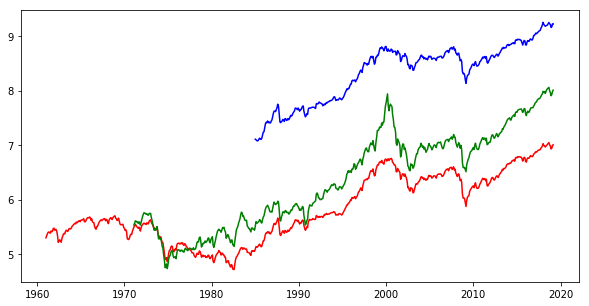

In [33]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(dji_cpi.index, np.log(dji_cpi["infl_adj"]), color = 'b')
ax.plot(gspc_cpi.index, np.log(gspc_cpi["infl_adj"]), color = 'r')
ax.plot(ixic_cpi.index, np.log(ixic_cpi["infl_adj"]), color = 'g')

plt.show()